# 概要
    <1> 導入套件
    <2> 讀取並初步處理資料
    <3> 計算蘋果(APPL.O)的短期均線&長期均線
    <4> 雙均線策略報酬分析
    <5> 分析均線參數「期間」對策略報酬之影響

## <1> 導入套件

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## <2> 讀取並初步處理資料

In [2]:
data = pd.read_csv('data.csv', index_col = 0, parse_dates = True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [4]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [5]:
data.dropna(inplace = True)
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


## <3> 計算蘋果(APPL.O)的短期均線&長期均線

#### 1.挑出蘋果的股票

In [6]:
data = data[['AAPL.O']]

In [7]:
data.head()

,AAPL.O
Date,
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827
2010-01-08,30.282827


#### 2.計算短期均線&長期均線
- 短期(SMA1) : 20天
- 長期(SMA2) : 240天

In [8]:
SMA1 = 20
SMA2 = 240

In [9]:
data['SMA1'] = data['AAPL.O'].rolling(window = SMA1).mean()
data['SMA2'] = data['AAPL.O'].rolling(window = SMA2).mean()

In [10]:
data.head()

,AAPL.O,SMA1,SMA2
Date,,,
2010-01-04,30.572827,NaN,NaN
2010-01-05,30.625684,NaN,NaN
2010-01-06,30.138541,NaN,NaN
2010-01-07,30.082827,NaN,NaN
2010-01-08,30.282827,NaN,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   SMA1    2119 non-null   float64
 2   SMA2    1899 non-null   float64
dtypes: float64(3)
memory usage: 66.8 KB


In [12]:
data.dropna(inplace = True)
data.head()

,AAPL.O,SMA1,SMA2
Date,,,
2010-12-14,45.755669,44.939616,36.667813
2010-12-15,45.765669,45.073687,36.731117
2010-12-16,45.892811,45.221901,36.794730
2010-12-17,45.801383,45.308901,36.859992
2010-12-20,46.029954,45.419472,36.926438


<Axes: xlabel='Date'>

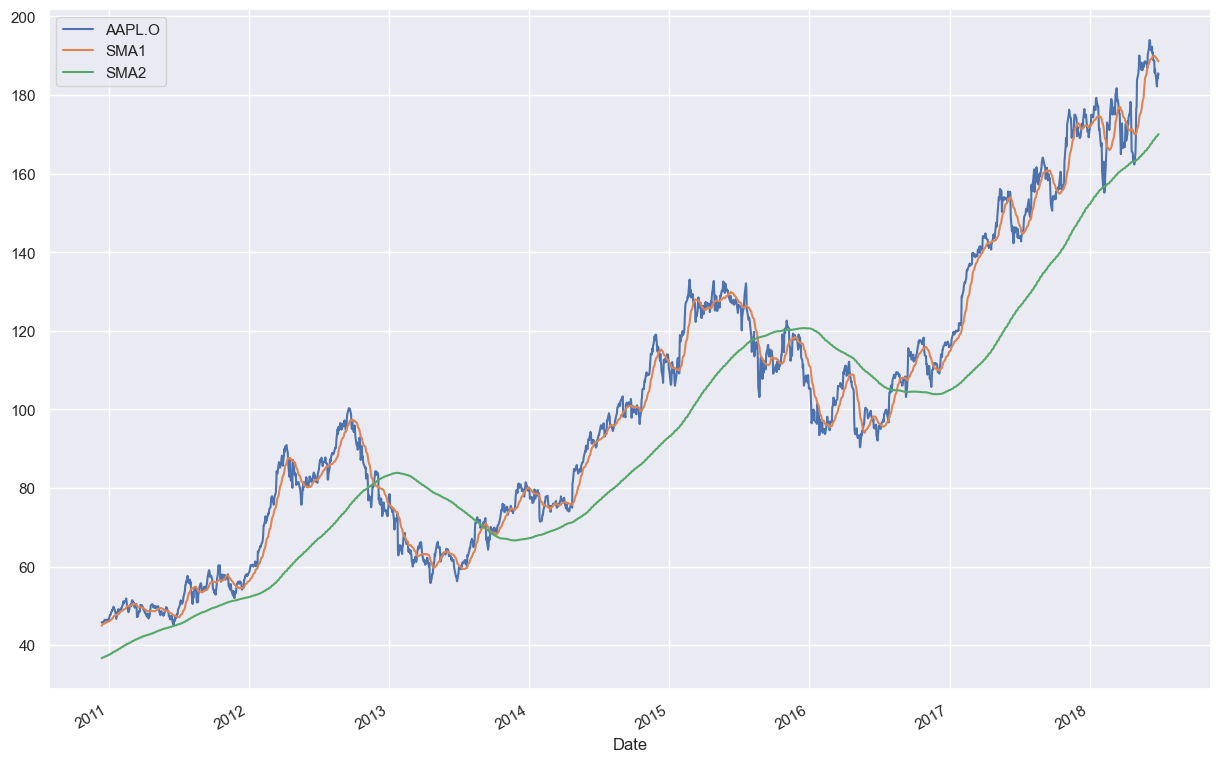

In [13]:
data.plot(figsize = (15,10))

#### 3.找出黃金交叉&死亡交叉的位置
- cross從-1到1為黃金交叉
- cross從1到-1為死亡交叉

In [14]:
data['cross'] = np.where( data['SMA1'] > data['SMA2'], 1, -1)
data.head()

,AAPL.O,SMA1,SMA2,cross
Date,,,,
2010-12-14,45.755669,44.939616,36.667813,1
2010-12-15,45.765669,45.073687,36.731117,1
2010-12-16,45.892811,45.221901,36.794730,1
2010-12-17,45.801383,45.308901,36.859992,1
2010-12-20,46.029954,45.419472,36.926438,1


<Axes: xlabel='Date'>

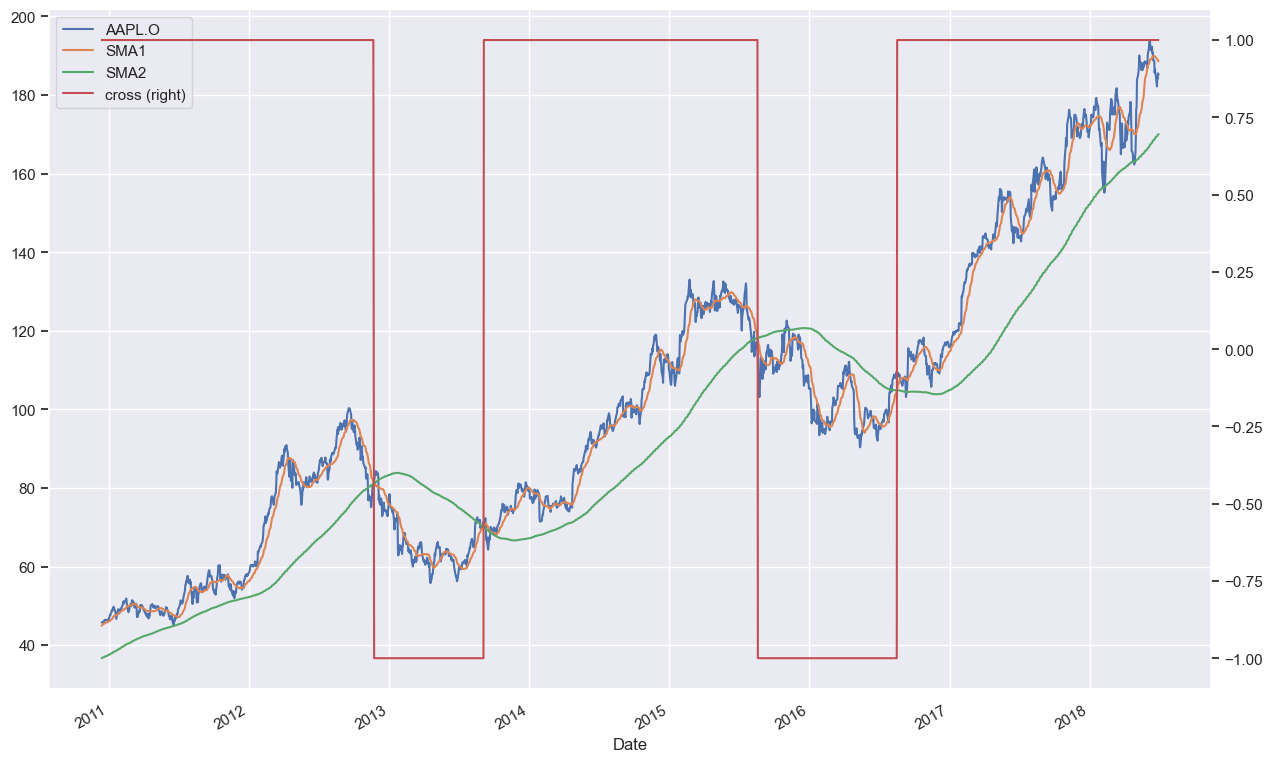

In [15]:
data.plot(figsize = (15,10), secondary_y = 'cross')

## <4> 雙均線策略報酬分析

- 買進持有報酬 : B&H
- 雙均線策略報酬 : Strategy

    (1) 若今天收盤時出現黃金交叉(cross從-1變成1)，則下一個交易日一開盤就要立即買進
        此時Strategy的報酬和B&H相同
           
    (2) 若今天收盤時出現死亡交叉(cross從1變成-1)，則下一個交易日一開盤就要立即賣出
        此時Strategy的報酬和B&H相反

In [16]:
data['B&H'] = np.log( data['AAPL.O'] / data['AAPL.O'].shift(1) )

In [17]:
data['Strategy'] = data['cross'].shift(1)* data['B&H']

In [18]:
data.head()

,AAPL.O,SMA1,SMA2,cross,B&H,Strategy
Date,,,,,,
2010-12-14,45.755669,44.939616,36.667813,1,NaN,NaN
2010-12-15,45.765669,45.073687,36.731117,1,0.000219,0.000219
2010-12-16,45.892811,45.221901,36.794730,1,0.002774,0.002774
2010-12-17,45.801383,45.308901,36.859992,1,-0.001994,-0.001994
2010-12-20,46.029954,45.419472,36.926438,1,0.004978,0.004978


In [19]:
data.dropna(inplace = True)
data.head()

,AAPL.O,SMA1,SMA2,cross,B&H,Strategy
Date,,,,,,
2010-12-15,45.765669,45.073687,36.731117,1,0.000219,0.000219
2010-12-16,45.892811,45.221901,36.794730,1,0.002774,0.002774
2010-12-17,45.801383,45.308901,36.859992,1,-0.001994,-0.001994
2010-12-20,46.029954,45.419472,36.926438,1,0.004978,0.004978
2010-12-21,46.314954,45.496937,36.993239,1,0.006173,0.006173


- 解析下表
    - 2012-11-23出現死亡交叉，亦即出現賣出信號，故下一個交易日2012-11-26一開盤就要「賣出」蘋果股票，
            因此2012-11-26 Strategy的報酬和B&H相反
    - 2012-11-26的cross和2012-11-27的cross同為-1，故交易方向不改
            ，仍維持賣出，Strategy報酬維持跟B&H相反
    - 2013-09-05出現黃金交叉，亦即出現買進信號，故下一個交易日2013-09-06一開盤就要「買進」蘋果股票，
            因此2013-09-07 Strategy的報酬和B&H相同
    - 2013-09-08的cross和2013-09-07的cross同為1，故交易方向不改，
            仍維持買進，Strategy報酬維持跟B&H相同

In [20]:
data[487:688]

,AAPL.O,SMA1,SMA2,cross,B&H,Strategy
Date,,,,,,
2012-11-21,80.242777,81.335027,81.052775,1,0.001401,0.001401
2012-11-23,81.642776,81.036060,81.160418,-1,0.017297,0.017297
2012-11-26,84.218487,80.841061,81.277031,-1,0.031061,-0.031061
2012-11-27,83.539916,80.664218,81.391876,-1,-0.008090,0.008090
2012-11-28,83.277060,80.513789,81.507429,-1,-0.003151,0.003151
...,...,...,...,...,...,...
2013-09-04,71.241500,69.999237,70.198437,-1,0.020483,-0.020483
2013-09-05,70.752786,70.215594,70.075324,1,-0.006884,0.006884
2013-09-06,71.174215,70.481380,69.955991,1,0.005939,0.005939


- 比較B&H和Strategy的報酬

<Axes: xlabel='Date'>

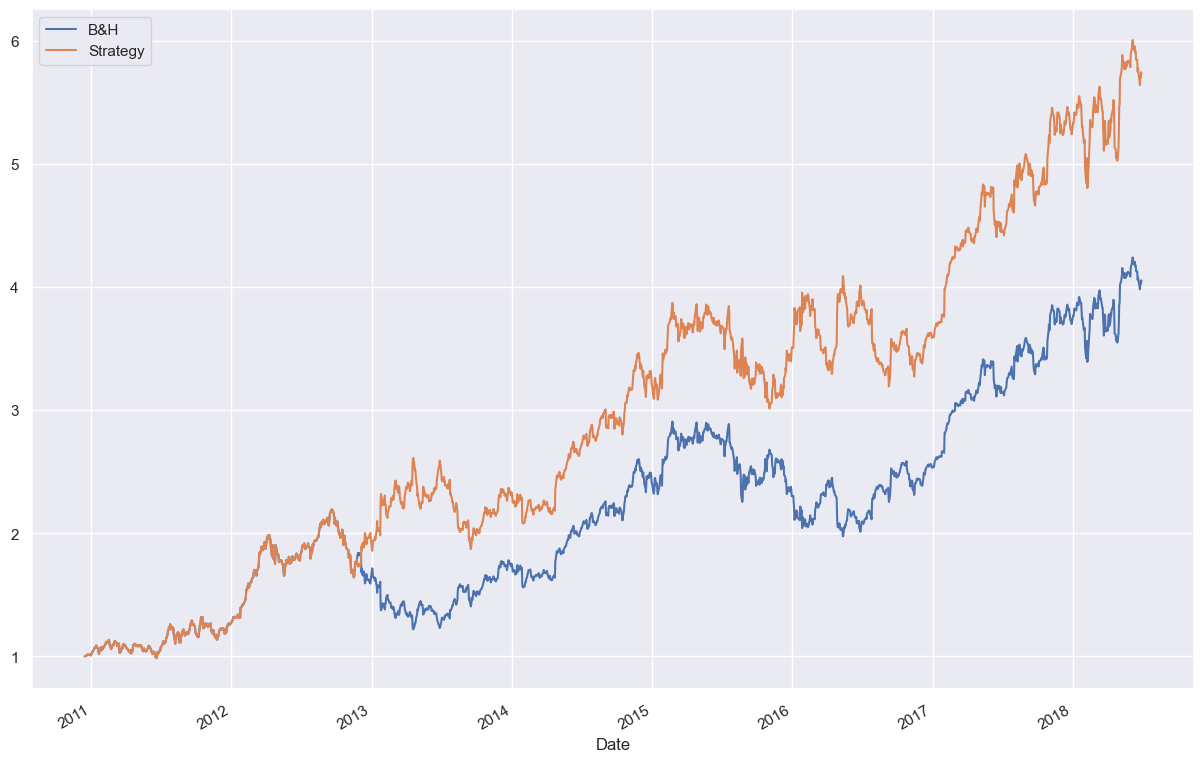

In [21]:
data[['B&H','Strategy']].cumsum().apply(np.exp).plot(figsize = (15,10))

## <5> 分析均線參數「期間」對策略報酬之影響

- 工具 from itertools import product : 此工具能幫助我們進行「迭代」這個工作

#### (1) SMA1期間長短分別用20到60之間的數字代入，間隔為4 : SMA1參數空間 = 20, 24, 28, ..., 56, 60
#### (2) SMA2期間長短分別用180到240之間的數字代入，間隔為10 : SMA2參數空間 = 180, 190, ..., 236, 240

In [22]:
from itertools import product 
sma1 = range(20, 61, 4)
sma2 = range(180, 281, 10)

- 為避免出現錯誤，將前面的所有程式，從讀取資料~輸出最後結果都重作一遍

In [23]:
data = pd.read_csv('data.csv', index_col = 0, parse_dates = True)
data = data[['AAPL.O']]
data.dropna(inplace = True)

- 開始進行迭代

- diff : Strategy累計報酬 - B&H累計報酬
    - if diff > 0 , 則Strategy好
    - else diff < 0 , 則B&H好

In [24]:
results = pd.DataFrame()   #  先建立一個空的df，用以儲存最後結果

for SMA1,SMA2 in product(sma1,sma2) :
    
    data['SMA1'] = data['AAPL.O'].rolling(window = SMA1).mean()
    data['SMA2'] = data['AAPL.O'].rolling(window = SMA2).mean()
    data.dropna(inplace = True)
    
    data['cross'] = np.where( data['SMA1'] > data['SMA2'], 1, -1)
    data['B&H'] = np.log( data['AAPL.O'] / data['AAPL.O'].shift(1) )
    data['Strategy'] = data['cross'].shift(1)* data['B&H']
    data.dropna(inplace = True)
    
    temp = np.exp( data[['B&H','Strategy']].sum() )
    
    results = results.append(pd.DataFrame({'SMA1':SMA1,
                                           'SMA2':SMA2,
                                           'B&H':temp['B&H'],
                                           'Strategy':temp['Strategy'],
                                           'diff':temp['Strategy'] - temp['B&H']
                                          },
                                          index = [0],   # 除錯用，若不加這行會報錯 : df缺少index
                                         ),
                             ignore_index = True  # 若不加，df每個index皆為0
                            )
    
results

AttributeError: 'DataFrame' object has no attribute 'append'